In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
import json


In [3]:
data=pd.DataFrame(pd.read_csv("IMDB Dataset.csv"))


In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
data['sentiment'] = data['sentiment'].apply(lambda x: 0 if x.strip()=='negative' else 1)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [6]:
sentences = data['review']
labels = data['sentiment']

In [7]:
sentences

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [8]:
labels

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

Splitting the data into training and testing

In [9]:
train_sentences = sentences[0:40000]
test_sentences = sentences[40000:]
train_labels = labels[0:40000]
test_labels = labels[40000:]

Performing text preprocessing

In [10]:
tokenizer = Tokenizer(num_words =10000 , oov_token = "<OOV>") ##Out of vocab=OOV
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')

In [11]:
print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, 'on': 21, 'not': 22, 'you': 23, 'are': 24, 'his': 25, 'have': 26, 'be': 27, 'one': 28, 'he': 29, 'all': 30, 'at': 31, 'by': 32, 'an': 33, 'they': 34, 'so': 35, 'who': 36, 'from': 37, 'like': 38, 'or': 39, 'just': 40, 'her': 41, 'about': 42, 'out': 43, 'if': 44, "it's": 45, 'has': 46, 'some': 47, 'there': 48, 'what': 49, 'good': 50, 'more': 51, 'when': 52, 'very': 53, 'up': 54, 'no': 55, 'time': 56, 'my': 57, 'even': 58, 'would': 59, 'she': 60, 'which': 61, 'only': 62, 'really': 63, 'see': 64, 'story': 65, 'their': 66, 'can': 67, 'had': 68, 'me': 69, 'well': 70, 'were': 71, 'than': 72, 'much': 73, 'we': 74, 'bad': 75, 'get': 76, 'been': 77, 'great': 78, 'do': 79, 'will': 80, 'other': 81, 'also': 82, 'people': 83, 'into': 84, 'because': 85, 'how': 86, 'him': 87, 'first': 88, 'most':

Model Creation

In [12]:
train_padded = np.array(train_padded)
test_padded =  np.array(test_padded)
train_labels =  np.array(train_labels)
test_labels =   np.array(test_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = 100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
]) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


Fitting the model

In [15]:
history = model.fit(train_padded, train_labels, epochs=30, validation_data=(test_padded, test_labels), verbose =2 )

Epoch 1/30
1250/1250 - 3s - loss: 0.4651 - accuracy: 0.7862 - val_loss: 0.3636 - val_accuracy: 0.8410
Epoch 2/30
1250/1250 - 2s - loss: 0.3160 - accuracy: 0.8661 - val_loss: 0.3564 - val_accuracy: 0.8438
Epoch 3/30
1250/1250 - 2s - loss: 0.2809 - accuracy: 0.8831 - val_loss: 0.3671 - val_accuracy: 0.8437
Epoch 4/30
1250/1250 - 3s - loss: 0.2601 - accuracy: 0.8930 - val_loss: 0.3907 - val_accuracy: 0.8339
Epoch 5/30
1250/1250 - 5s - loss: 0.2455 - accuracy: 0.8998 - val_loss: 0.4046 - val_accuracy: 0.8331
Epoch 6/30
1250/1250 - 4s - loss: 0.2357 - accuracy: 0.9053 - val_loss: 0.4140 - val_accuracy: 0.8338
Epoch 7/30
1250/1250 - 2s - loss: 0.2263 - accuracy: 0.9106 - val_loss: 0.4336 - val_accuracy: 0.8292
Epoch 8/30
1250/1250 - 5s - loss: 0.2196 - accuracy: 0.9141 - val_loss: 0.4510 - val_accuracy: 0.8240
Epoch 9/30
1250/1250 - 5s - loss: 0.2146 - accuracy: 0.9151 - val_loss: 0.4577 - val_accuracy: 0.8244
Epoch 10/30
1250/1250 - 2s - loss: 0.2098 - accuracy: 0.9191 - val_loss: 0.4718 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


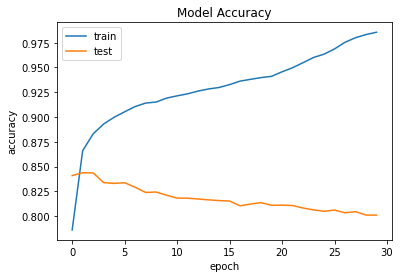

In [16]:
print(history.history.keys())
import matplotlib.pyplot as plt
#summarize history fo accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


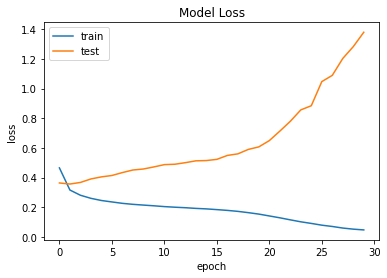

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor='val_accuracy',verbose=1,patience=5,mode='auto')

In [20]:
history=model.fit(train_padded,train_labels,epochs=30,validation_data=(test_padded,test_labels),verbose=2,callbacks=[callbacks])

Epoch 1/30
1250/1250 - 4s - loss: 0.0403 - accuracy: 0.9883 - val_loss: 1.4314 - val_accuracy: 0.8014
Epoch 2/30
1250/1250 - 5s - loss: 0.0346 - accuracy: 0.9904 - val_loss: 1.5506 - val_accuracy: 0.7999
Epoch 3/30
1250/1250 - 3s - loss: 0.0316 - accuracy: 0.9916 - val_loss: 1.6837 - val_accuracy: 0.8008
Epoch 4/30
1250/1250 - 3s - loss: 0.0265 - accuracy: 0.9933 - val_loss: 1.7239 - val_accuracy: 0.7993
Epoch 5/30
1250/1250 - 4s - loss: 0.0242 - accuracy: 0.9935 - val_loss: 1.8135 - val_accuracy: 0.7986
Epoch 6/30
1250/1250 - 4s - loss: 0.0220 - accuracy: 0.9944 - val_loss: 1.9203 - val_accuracy: 0.7989
Epoch 00006: early stopping
